# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

<IPython.core.display.Javascript object>


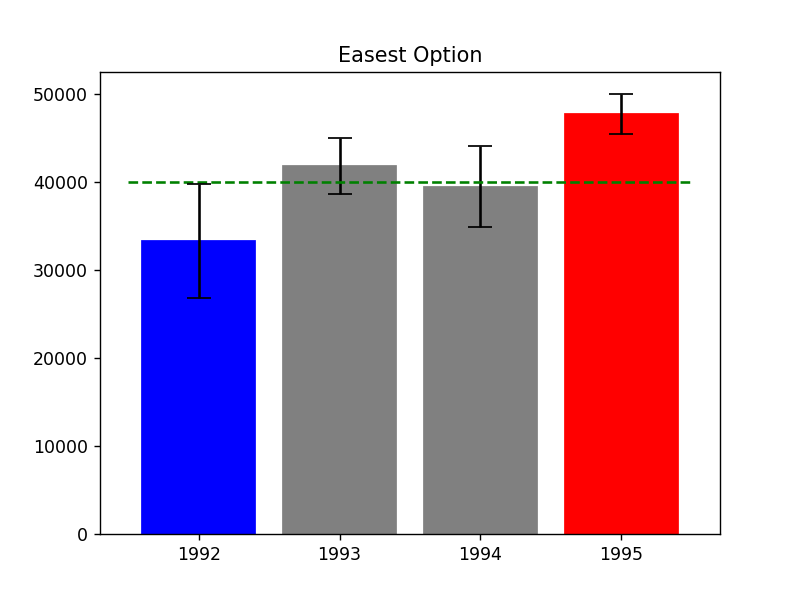

In [143]:
#Easiest Option
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
%matplotlib notebook

# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df = df.transpose()
df_summary = df.describe()

#Easiest
color=['blue', 'gray', 'red']

#Horizontal Threshold Provided by User
threshold = 40000

#Calculating Mean and 95% Condifence Interval of the data
average = df_summary.loc['mean']
x_vals = df_summary.columns
error_95=df_summary.loc['std']*1.96/np.sqrt(df_summary.loc['count'])

#Ploting initial bar chart with error
plt.figure()
bar_plt = plt.bar(x_vals, average, yerr=error_95, width=0.8, capsize = 7)
x_axis = plt.xticks(x_vals)

#Coloring charts based on their relation to the set threshold value
for i, avg in enumerate(average):
    if avg+error_95.iloc[i] < threshold:
        bar_plt[i].set_color(color[0])
    elif avg-error_95.iloc[i] > threshold:
        bar_plt[i].set_color(color[2])
    else:
        bar_plt[i].set_color(color[1])
threshold_line = plt.hlines(threshold, 1991.5,1995.5, colors = 'green', linestyles='dashed')
title = plt.title('Easest Option')


<IPython.core.display.Javascript object>


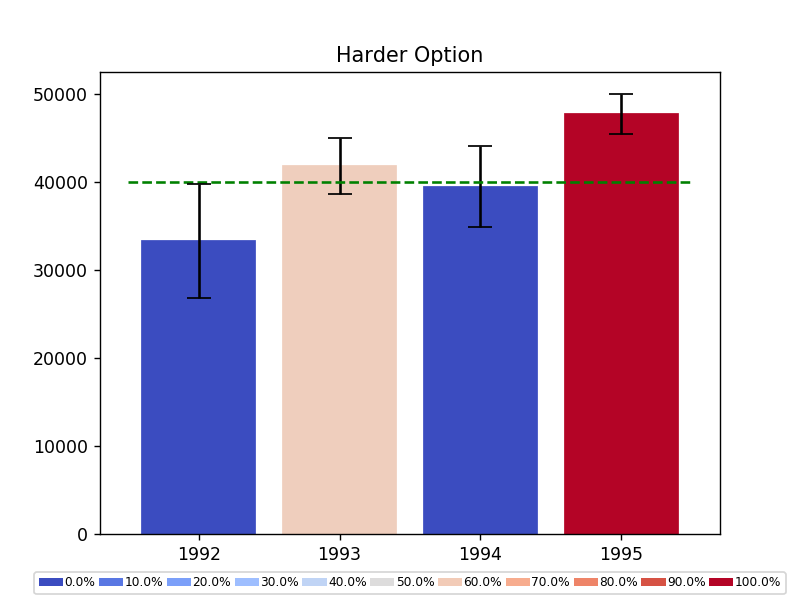

In [144]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

threshold = 40000

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df = df.transpose()
df_summary = df.describe()

#Calculating Average and 95% Confidence Interval
average = df_summary.loc['mean']
x_vals = df_summary.columns
error_95= df_summary.loc['std']*1.96/np.sqrt(df_summary.loc['count'])

#Finding the normalized error and adding 95% confidence interval and normalized error data to summarized dataframe
normalized_error_threshold = (average - threshold)/error_95
normalized_error_threshold = normalized_error_threshold.to_frame()\
    .transpose()\
    .rename({0: 'Normalized Err w Threshold'}, axis='index')

error_95 = error_95.to_frame()\
    .transpose()\
    .rename({0: '95% Confidence Interval'}, axis='index')

df_summary = df_summary.append([error_95, normalized_error_threshold])

#Generating a colormap to color the graphs in a gradient fashion
cmap = get_cmap('coolwarm')
color_grad = [cmap(x) for x in df_summary.loc['Normalized Err w Threshold']] # Assign colour depending on norm value.

#Plotting uncolored graph
plt.figure()
bar_plt = plt.bar(x_vals, average, yerr=df_summary.loc['95% Confidence Interval'], width=0.8, capsize = 7)
x_axis = plt.xticks(x_vals)
threshold_line = plt.hlines(threshold, 1991.5,1995.5, colors = 'green', linestyles='dashed')
title = plt.title('Harder Option')

#Coloring the bar graph based on the color gradient
for i, bar in enumerate(bar_plt):
    bar.set_color(color_grad[i])

#Generating the legend for added clarity
dct= {}
for i in np.arange(0, 1.1, 0.1):
    i = round(i,1)
    temp = {cmap(i) : str(i*100)+'%'}
    dct[cmap(i)] = str(i*100)+'%'

bars_leg=[]
for k, v in dct.items():
    p=Rectangle((0, 0), 1, 1, fc=k, label=v)
    bars_leg.append(p)
    
my_legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.3, handletextpad=0.1, fontsize=7)



<IPython.core.display.Javascript object>


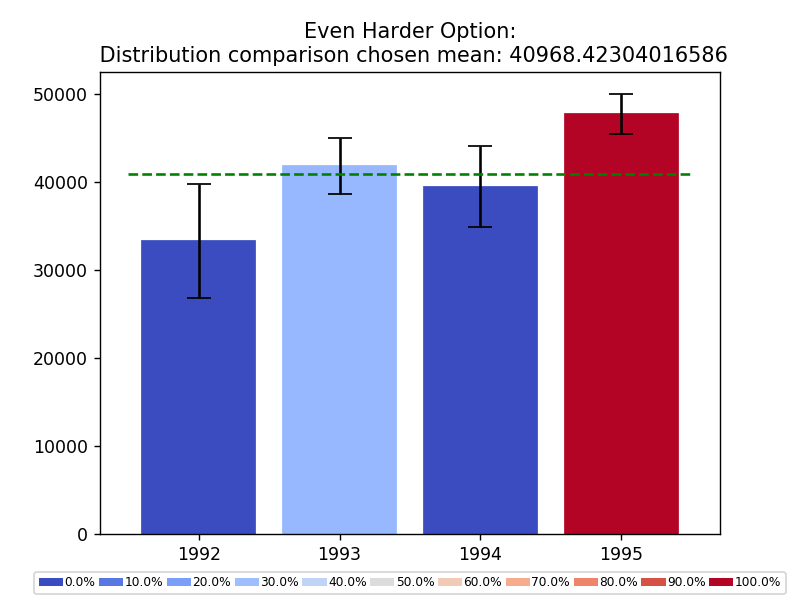

In [145]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle



np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df = df.transpose()
df_summary = df.describe()

#Calculating Average and 95% Confidence Interval
average = df_summary.loc['mean']
x_vals = df_summary.columns
error_95= df_summary.loc['std']*1.96/np.sqrt(df_summary.loc['count'])

#Finding the normalized error and adding 95% confidence interval and normalized error data to summarized dataframe

error_95 = error_95.to_frame()\
    .transpose()\
    .rename({0: '95% Confidence Interval'}, axis='index')

df_summary = df_summary.append(error_95)

#Generating a colormap to color the graphs in a gradient fashion

#Plotting uncolored graph
plt.figure()
bar_plt = plt.bar(x_vals, average, yerr=df_summary.loc['95% Confidence Interval'], width=0.8, capsize = 7)
x_axis = plt.xticks(x_vals)
title = plt.title('Even Harder Option')


#Generating the legend for added clarity
    
#On Click Even Interactions
def onclick(event):
    #Get Y Value of click
    threshold = event.ydata
    #Finding the normalized error and adding 95% confidence interval and normalized error data to summarized dataframe
    normalized_error_threshold = (average - threshold)/error_95
#Generating the color map
    cmap = get_cmap('coolwarm')
    color_grad = [cmap(x) for x in normalized_error_threshold.iloc[0]] # Assign colour depending on norm value.
#Clearing the plot   
    plt.cla()
    #Replotting the bar chart
    bar_plt = plt.bar(x_vals, average, yerr=df_summary.loc['95% Confidence Interval'], width=0.8, capsize = 7)
    #plotting the horizontal line
    h_line = plt.gca().hlines(event.ydata, 1991.5,1995.5, colors = 'green', linestyles='dashed')
    title = plt.gca().set_title('Even Harder Option:\n Distribution comparison chosen mean: {}'.format( event.ydata))
    x_axis = plt.xticks(x_vals)
#Setting the bar colors according to the probability    
    for i, bar in enumerate(bar_plt):
        bar.set_color(color_grad[i])
#Generating the legend
    dct= {}
    for i in np.arange(0, 1.1, 0.1):
        i = round(i,1)
        temp = {cmap(i) : str(i*100)+'%'}
        dct[cmap(i)] = str(i*100)+'%'

    bars_leg=[]
    for k, v in dct.items():
        p=Rectangle((0, 0), 1, 1, fc=k, label=v)
        bars_leg.append(p)
    
    my_legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.3, handletextpad=0.1, fontsize=7)    
    
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)